In [13]:
#!/home/ru56cir/rabbithole/MobileRabbitHoleProcessML/rabbitholeenv/bin/activate python
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedGroupKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import ML_helpers
import shap
shap.initjs()
from sklearn import decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib

from random import randint

from tqdm.notebook import tqdm
from multiprocessing import Pool

import time

In [14]:
import os
os.getcwd()

'C:\\projects\\rabbithole\\MobileRabbitHoleProcessML\\src'

In [15]:
#def random_subset(s):
#    out = set()
#    for el in s:
#        # random coin flip
#        if randint(0, 1) == 0:
#            out.add(el)
#    return out

matplotlib.rcParams["figure.dpi"] = 200
size = 11
ticksize = 11
legendsize = 11
plt.rc('font', size=size)  # controls default text size
plt.rc('axes', titlesize=size)  # fontsize of the title
plt.rc('axes', labelsize=size)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=ticksize)  # fontsize of the x tick labels
plt.rc('ytick', labelsize=ticksize)  # fontsize of the y tick labels
plt.rc('legend', fontsize=legendsize)  # fontsize of the legend

dataframe_dir_ml = r'../../RabbitHoleProcess/data/dataframes/sessions_ml'
dataframe_dir_results = rf"../../RabbitHoleProcess/data/results"
dataframe_dir_ml_labeled = f'../../RabbitHoleProcess/data/dataframes/sessions_ml/labled_data'
dataframe_dir_ml_labeled_selected = f'../../RabbitHoleProcess/data/dataframes/ML/labled_data/labled'
dataframe_dir_ml_labeled_all = f'../../RabbitHoleProcess/data/dataframes/ML/labled_data/labled_all'
dataframe_dir_ml_labeled_m = f'../../RabbitHoleProcess/data/dataframes/ML/labled_data/labled_first_more'


def svm_classifier(x, y, filename, report_df):
    print("***SVM***")
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

    # svclassifier = SVC(kernel='rbf')
    svclassifier = SVC(kernel='sigmoid')
    svclassifier.fit(x_train, y_train)

    y_predict = svclassifier.predict(x_test)

    print("-----report----------")
    print(metrics.classification_report(y_test, y_predict))  # output_dict=True))
    report = pd.DataFrame.from_dict(metrics.classification_report(y_test, y_predict, output_dict=True))
    report['target'] = filename
    report['algorithm'] = "SVM"

    print("-----score----------")
    score = metrics.accuracy_score(y_test, y_predict)
    print(score)
    report['score'] = score

    print("---------confusion matrix--------")
    cm = confusion_matrix(y_test, y_predict)
    print(cm)

    return pd.concat([report_df, report])


def naive_bayes_classifier(x, y, filename, report_df):
    print("naive bayes")
    labels = y.unique()
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    NB = GaussianNB()
    NB.fit(x_train, y_train)

    # Predict Output
    y_predict = NB.predict(x_test)

    print("-----report----------")
    print(metrics.classification_report(y_test, y_predict))  # output_dict=True))
    report = pd.DataFrame.from_dict(metrics.classification_report(y_test, y_predict, output_dict=True))
    report['target'] = filename
    report['algorithm'] = "naive_bayes"

    print("-----score----------")
    score = metrics.accuracy_score(y_test, y_predict)
    print(score)
    report['score'] = score

    print("---------confusion matrix--------")
    cm = confusion_matrix(y_test, y_predict)
    print(cm)

    return pd.concat([report_df, report])


def kNeighbors_classifier(x, y, filename, report_df):
    print('***KNeighborsClassifier***')
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

    KNN = KNeighborsClassifier(n_neighbors=3)
    # fit the model
    KNN.fit(x_train, y_train)

    # Predict Output
    y_predict = KNN.predict(x_test)

    print("-----report----------")
    print(metrics.classification_report(y_test, y_predict))  # output_dict=True))
    report = pd.DataFrame.from_dict(metrics.classification_report(y_test, y_predict, output_dict=True))
    report['target'] = filename
    report['algorithm'] = "KNN"

    print("-----score----------")
    score = metrics.accuracy_score(y_test, y_predict)
    print(score)
    report['score'] = score

    print("---------confusion matrix--------")
    cm = confusion_matrix(y_test, y_predict)
    print(cm)

    return pd.concat([report_df, report])


def random_forest_classifier(x_train_features, y_train_labels, x_test_features, y_test_labels, filename, report_df):
    feature_list = x_train_features.columns
    print('\n\n***Random Forest***')

    #forest2 = RandomForestClassifier()#criterion='gini', n_estimators=5, random_state=42, n_jobs=2)
    # BalancedRandomForestClassifier(n_estimators=10)
 #   forest.fit(x_train_features, y_train_labels)

##### parameter tuning
   # param_grid = {
   #     'n_estimators': [5, 10, 100, 200, 500, 700, 1000],
   #     'max_features': ['sqrt', 'log2'],
   #     'max_depth': [4, 5, 6, 7, 8, None],
   #     'criterion': ['gini', 'entropy']
   # }
   # list(zip(itertools.repeat(10), l))
   # CV_rfc = GridSearchCV(estimator=forest2, param_grid=param_grid, cv=5)
   # CV_rfc.fit(x_train_features, y_train_labels)
   # 
   # best_params = CV_rfc.best_params_
   # print('Best params:')
   # print(best_params)
##### training

    # Model                 RF
    # n_estimators           5
    # max_features        sqrt
    # max_depth            4.0
    # AccTrain        0.848161
    # AccTest         0.834752
    
    # Model                 RF
    # n_estimators         500
    # max_features        sqrt
    # max_depth           10.0
    # criterion       log_loss
    # AccTrainMean    0.971067
    # AccTrainSD      0.000688
    # AccTestMean     0.813372
    # AccTestSD       0.002922

    # n_estimators         500
    # max_features        log2
    # max_depth           10.0
    # criterion           gini
    
   #     Model                      RF
   # n_estimators              200
   # max_features             log2
   # max_depth                 8.0
   # min_samples_leaf            2
   # min_samples_split          10
   # criterion            log_loss
   # AccTrainMean         0.901762
   # AccTrainSD           0.000822
   # AccTestMean          0.881064
   # AccTestSD            0.004538
   # TrainTimeMean        3.833549
    
    forest = RandomForestClassifier(
        max_features="log2",
        n_estimators=700,
        max_depth=10,
        criterion="gini",
        #random_state=42,
        min_samples_leaf=1,
        min_samples_split=2,
        n_jobs=10
    )
    forest.fit(x_train_features, y_train_labels)

    print(forest.classes_)
    
    print("----- Report Train (Run 1) -----")
    y_predict = forest.predict(x_train_features)
    score = metrics.accuracy_score(y_train_labels, y_predict)
    print(score)
    print(metrics.classification_report(y_train_labels, y_predict))  # output_dict=True))

    print("----- Report Validation (Run 2) -----")
    y_predict = forest.predict(x_test_features)
    print(metrics.classification_report(y_test_labels, y_predict))  # output_dict=True))
    report = pd.DataFrame.from_dict(metrics.classification_report(y_test_labels, y_predict, output_dict=True))
    report['target'] = filename
    report['algorithm'] = "random_forest"

    print("-----score----------")
    score = metrics.accuracy_score(y_test_labels, y_predict)
    print(score)
    report['score'] = score

    print("---------confusion matrix--------")
    cm = confusion_matrix(y_test_labels, y_predict)
    print(cm)

    print("-------importance--------")
    importance = pd.DataFrame({'feature': feature_list, 'importance': np.round(forest.feature_importances_, 3)})
    importance.sort_values('importance', ascending=False, inplace=True)
    print(importance)
    importance.to_csv(fr'./{filename}-randomForest_f_importance.csv')

    print("---------------SHAP PLOTS-------------")
    print(f'0: {forest.classes_[0]}, 1: {forest.classes_[1]}')
  # #  forest.classes_ = ['no_rabbithole' 'rabbit_hole']
    explainer = shap.TreeExplainer(forest)
  #   explainer = shap.Explainer(forest)
    shap_values = explainer.shap_values(x_train_features, check_additivity=False, approximate=True)
    #shap_values = explainer(x_train_features, check_additivity=False)
    print(type(x_train_features))
  #
  #   X = x_test_features
  #   # ### Waterfall plot for first observation
  #   shap_values_nparray = np.array(shap_values)
  #
  #   shap.plots.waterfall(shap_values_nparray[0])
  #   # ### Forceplot for first observation
  #   shap.plots.force(shap_values_nparray[0])
  #
  #   # ### Mean SHAP
  #   shap.plots.bar(shap_values_nparray)
  #
  #   # ### Beeswarm plot
  #   shap.plots.beeswarm(shap_values_nparray)
  #
  #   # ### Decision Plot
  #   # Get expected value and shap values array
  #   expected_value = explainer.expected_value
  #   shap_array = explainer.shap_values(X)
  #   # Descion plot for first 10 observations
  #   shap.decision_plot(expected_value, shap_array[0:10], feature_names=list(X.columns))



    plt.figure()
    fig = plt.figure(dpi=200)
    shap.summary_plot(shap_values[0], x_train_features, plot_type="bar", max_display=30, show=False)
    plt.title("Random Forest - Shap values 0")
    fig.tight_layout()
    matplotlib.rcParams["figure.dpi"] = 200
 #   plt.show()
    plt.savefig("../../RabbitHoleProcess\\data\\results\\figures\\plt1.png")

    fig = plt.figure(dpi=200)
    shap.summary_plot(shap_values[0], x_train_features, plot_type="dot", max_display=30, show=False)
    plt.title("Random Forest - Shap values 0")
    fig.tight_layout()
 #   plt.show()
    plt.savefig("../../RabbitHoleProcess\\data\\results\\figures\\plt2.png")

    fig = plt.figure(dpi=200)
    shap.summary_plot(shap_values[1], x_train_features, plot_type="bar", max_display=30, show=False)
    plt.title("Random Forest - Shap values 1")
    fig.tight_layout()
 #   plt.show()
    plt.savefig("../../RabbitHoleProcess\\data\\results\\figures\\plt3.png")

    fig = plt.figure(dpi=200)
    shap.summary_plot(shap_values[1], x_train_features, plot_type="dot", max_display=30, show=False)
    plt.title("Random Forest - Shap values 1")
    fig.tight_layout()
   # plt.show()
    plt.savefig("../../RabbitHoleProcess\\data\\results\\figures\\plt4.png")

    # shap.summary_plot(shap_values[1], features=x_train_features, plot_type='dot', feature_names=feature_list) #, max_display=features_list_g.shape[0])
    # shap.summary_plot(shap_values[0], x_train_features, plot_type='layered_violin', max_display=30)
    # plt.show()

    return pd.concat([report_df, report]), forest


def decision_tree_classifier(x, y, filename, report_df):
    print('***Decision tree***')
    feature_list = x.columns
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

    clf_model = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42, min_samples_leaf=5)
    clf_model.fit(x_train, y_train)

    y_predict = clf_model.predict(x_test)

    print("-----report----------")
    print(metrics.classification_report(y_test, y_predict))  # output_dict=True), file=f)
    report = pd.DataFrame.from_dict(metrics.classification_report(y_test, y_predict, output_dict=True))
    report['target'] = filename
    report['algorithm'] = "decision_tree"  # 'str' + df['col'].astype(str)

    print("-----score----------")
    score = metrics.accuracy_score(y_test, y_predict)
    print(score)
    report['score'] = score

    print("---------confusion matrix--------")
    cm = confusion_matrix(y_test, y_predict)
    print(cm)

    print("-------importance--------")
    importance = pd.DataFrame({'feature': x_train.columns, 'importance': np.round(clf_model.feature_importances_, 3)})
    importance.sort_values('importance', ascending=False, inplace=True)
    importance.reset_index(drop=True, inplace=True)
    print(importance)
    importance.to_csv(fr'{dataframe_dir_results}\feature_importance\{filename}-decision_tree_f_importance.csv')
    print(type(report_df))
    print(type(report))

    print("---------------SHAP PLOTS-------------")
    print(f'0: {clf_model.classes_[0]}, 1: {clf_model.classes_[1]}')
    # forest.classes_ = ['no_rabbithole' 'rabbit_hole']
    explainer = shap.TreeExplainer(clf_model)
    shap_values = explainer.shap_values(x_train)

    print(type(x_train))
    plt.show()

    plt.figure()

    # plt.figure()
    shap.summary_plot(shap_values[0], x_train, plot_type="bar", max_display=15, show=False)
    plt.title("Decision Tree - Shap values 0")
    plt.show()

    shap.summary_plot(shap_values[0], x_train, plot_type="dot", max_display=15, show=False)
    plt.title("Decision Tree - Shap values 0")
    plt.show()

    shap.summary_plot(shap_values[1], x_train, plot_type="bar", max_display=15, show=False)
    plt.title("Decision Tree - Shap values 1")
    plt.show()

    shap.summary_plot(shap_values[1], x_train, plot_type="dot", max_display=15, show=False)
    plt.title("Decision Tree - Shap values 1")
    plt.show()

    print(type(feature_list))
    return pd.concat([report_df, report])


def dt_grid_search(X, y):
    print("grid_search")
    std_slc = StandardScaler()
    pca = decomposition.PCA()
    dec_tree = DecisionTreeClassifier()

    pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])
    n_components = list(range(1, X.shape[1] + 1, 1))
    criterion = ['gini', 'entropy']
    max_depth = [2, 4, 6, 8, 10, 12]

    parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)
    pram = {"criterion": criterion,
            "max_depth": max_depth,
            "min_samples_split": range(1, 10),
            "min_samples_lead": range(1, 5)}

    clf_GS = GridSearchCV(dec_tree, param_grid=pram, cv=10)
    clf_GS.fit(X, y)

    print('Best Criterion:', clf_GS.best_estimator_.get_params()['criterion'])
    print('Best max_depth:', clf_GS.best_estimator_.get_params()['max_depth'])
    print('min_samplesplit:', clf_GS.best_estimator_.get_params()['min_samples_split'])
    print('min samples_lead:', clf_GS.best_estimator_.get_params()['min_samples_lead'])
    print()
    print(clf_GS.best_estimator_.get_params()['dec_tree'])

In [4]:
pd.set_option('display.max_columns', None)

report_all = pd.DataFrame()

#path = fr'/data/user-sessions_features_all_labled_more_than_intention_normal_age_no_esm_no_personal.pickle'
path = fr'C:\projects\rabbithole\RabbitHoleProcess\data\dataframes\sessiongroups-ml\labled_data\user-sessions_features_all_labled_more_than_intention_normal_age_no_esm_no_personal.pickle'

print(f'###################  target: {path}   #############################')  # , file=f)
df_sessions = pd.read_pickle(path)

df_sessions = df_sessions[~df_sessions['f_session_group_timespan'].isnull()]
df_sessions = df_sessions.fillna(0)

lstKeep = []
for c in df_sessions.columns:
    
    if ("f_hour_of_day_" in c):
        lstKeep.append(c)
        
timeValues = [(lambda x: float(x.split("_")[-1]))(x) for x in lstKeep]
df_sessions["f_hour_of_day"] = df_sessions[lstKeep].apply(lambda x: sum(x.values * timeValues), axis=1)

lstKeep = []
for c in df_sessions.columns:
    
    if ("f_weekday_" in c):
        lstKeep.append(c)
        
timeValues = [(lambda x: float(x.split("_")[-1]))(x) for x in lstKeep]
df_sessions["f_weekday"] = df_sessions[lstKeep].apply(lambda x: sum(x.values * timeValues), axis=1)

###################  target: C:\projects\rabbithole\RabbitHoleProcess\data\dataframes\sessiongroups-ml\labled_data\user-sessions_features_all_labled_more_than_intention_normal_age_no_esm_no_personal.pickle   #############################


In [16]:
lstFeatures = [
 'f_activity_resumed_count',
 'f_activity_resumed_frequency',
 #'f_bag_of_apps',
 'f_click_frequency',
 'f_clicks',
 'f_count_session_1h',
 'f_count_session_2h',
 'f_count_session_3h',
 'f_glances_since_last_session',
 'f_hour_of_day',
 'f_internet_connected_WIFI',
 'f_internet_connected_mobile',
 'f_internet_disconnected',
 'f_internet_else',
 'f_ringer_mode_normal',
 'f_ringer_mode_silent',
 'f_ringer_mode_unknown',
 'f_ringer_mode_vibrate',
 'f_scroll_frequency',
 'f_scrolls',
 #'f_sequences_apps',
 'f_session_count_in_group',
 'f_session_group_length_active',
 'f_session_group_length_active_mean',
 'f_session_group_length_active_median',
 'f_session_group_length_active_sd',
 'f_session_group_timespan',
 'f_time_since_last_session',
 'f_weekday',
 #'count',
 #'group_id',   
 #'session_ids',
 #'studyID',    
 #'p_id',
 #'target_label',
 #'timestamp_1',
 #'timestamp_2'
]

for c in df_sessions.columns:
    if ("f_weekday_" in c):
        lstFeatures.append(c)
        
for c in df_sessions.columns:
    
    if ("f_hour_of_day_" in c):
        lstFeatures.append(c)

for c in df_sessions.columns:
    
    if ("_category_" in c):
        None
        lstFeatures.append(c)

lstFeatures = sorted(lstFeatures)

len(sorted(lstFeatures))

262

In [6]:
ids = df_sessions['studyID'].unique()
trainIDs = ids[:15]
validationIDs = ids[15:20]
testIDs = ids[20:]
#trainIDs = ids[:13]
#validationIDs = ids[13:20]
#testIDs = ids[20:]
print(trainIDs, validationIDs, testIDs)
print(len(trainIDs), len(validationIDs), len(testIDs))

['AN23GE' 'AY1221' 'BI21FR' 'BR04WO' 'BR22NO' 'CO07FA' 'CR11AI' 'EL28LO'
 'fr29ka' 'ha07fl' 'IM12WE' 'IN24RA' 'IR03JO' 'ju05ab' 'KE18ZA'] ['LE13FO' 'MA06DR' 'PA29BU' 'SA23BR' 'SHTUSI'] ['SO23BA' 'so30vo' 'ta22ar' 'TH28RU' 'ZA23PA']
15 5 5


In [7]:
dfTrain = df_sessions[df_sessions.studyID.isin(trainIDs)]
dfVal = df_sessions[df_sessions.studyID.isin(validationIDs)]
dfTest = df_sessions[df_sessions.studyID.isin(testIDs)]

In [8]:
xTrain, yTrain = ML_helpers.oversampling_smote(dfTrain[lstFeatures], dfTrain["target_label"])
#xTrain, yTrain = xTrain.values, yTrain.values
xVal, yVal = ML_helpers.oversampling_smote(dfVal[lstFeatures], dfVal["target_label"])
#xVal, yVal = xVal.values, yVal.values 
#xTest, yTest = dfTest[lstFeatures], dfTest["target_label"]

xTest, yTest  = ML_helpers.oversampling_smote(dfTest[lstFeatures], dfTest["target_label"])

----oversampling smote-----
Original dataset shape Counter({'no_rabbithole': 5845, 'rabbit_hole': 332})
Resample dataset shape Counter({'no_rabbithole': 5845, 'rabbit_hole': 5845})
----oversampling smote-----
Original dataset shape Counter({'no_rabbithole': 1410, 'rabbit_hole': 12})
Resample dataset shape Counter({'no_rabbithole': 1410, 'rabbit_hole': 1410})
----oversampling smote-----
Original dataset shape Counter({'no_rabbithole': 2432, 'rabbit_hole': 93})
Resample dataset shape Counter({'no_rabbithole': 2432, 'rabbit_hole': 2432})


In [ ]:
param_grid = {
    'n_estimators': [5, 10, 100, 200, 500, 700], #, 1000], #, 2000, 3000],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [4, 5, 6, 7, 8, 10, 12, 14, None],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_leaf': [1,  2, 4],
    'min_samples_split': [2, 5, 10],
}
lst = []
for e in param_grid['n_estimators']:
    for mf in param_grid['max_features']:
        for md in param_grid['max_depth']:
            for c in param_grid['criterion']:
                for minl in param_grid['min_samples_leaf']:
                    for mins in param_grid['min_samples_split']:
                        for runs in range(5):
                            lst.append([e, mf, md, c, minl, mins])
len(lst)

def doJob(x):
    e, mf, md, c, minl, mins= x
    starttime = time.time()
    forest = RandomForestClassifier(
        max_features=mf,
        n_estimators=e,
        max_depth=md,
        criterion=c,
        #random_state=42,
        min_samples_leaf=minl,
        min_samples_split=mins,
        n_jobs=1
    )
    forest.fit(xTrain, yTrain)
    endtime = time.time()
    y_predict = forest.predict(xTrain)
    scoreTrain = metrics.accuracy_score(yTrain, y_predict)
    
    y_predict = forest.predict(xVal)
    scoreTest = metrics.accuracy_score(yVal, y_predict)
    
    return ["RF", e, mf, md, c, minl, mins, scoreTrain, scoreTest, endtime-starttime]

with Pool(40) as p:
    r = list(tqdm(p.imap(doJob, lst), total=len(lst)))

  0%|          | 0/21870 [00:00<?, ?it/s]

In [9]:
dfStats = pd.DataFrame(r)
dfStats.columns = ["Model", "n_estimators", "max_features", "max_depth", "criterion", "min_samples_leaf", "min_samples_split", "AccTrain", "AccTest", "TrainTime"]
dfStats = dfStats.groupby(["Model", "n_estimators", "max_features", "max_depth", "min_samples_leaf", "min_samples_split", "criterion"]).describe()
dfStats = dfStats[[("AccTrain", "mean"), ("AccTrain", "std"), ("AccTest", "mean"), ("AccTest", "std"), ("TrainTime", "mean")]]
dfStats.columns = ["AccTrainMean", "AccTrainSD", "AccTestMean", "AccTestSD", "TrainTimeMean"]
dfStats = dfStats.reset_index()
dfStats = dfStats.sort_values("AccTestMean", ascending=False)
dfStats[dfStats.AccTestMean >.875]

NameError: name 'r' is not defined

In [121]:
dfStats.iloc[1]

Model                      RF
n_estimators              200
max_features             log2
max_depth                 8.0
min_samples_leaf            2
min_samples_split          10
criterion            log_loss
AccTrainMean         0.901762
AccTrainSD           0.000822
AccTestMean          0.881064
AccTestSD            0.004538
TrainTimeMean        3.833549
Name: 1421, dtype: object

ML start.


***Random Forest***
['no_rabbithole' 'rabbit_hole']
----- Report Train (Run 1) -----
0.9550898203592815
               precision    recall  f1-score   support

no_rabbithole       0.96      0.95      0.95      5845
  rabbit_hole       0.95      0.96      0.96      5845

     accuracy                           0.96     11690
    macro avg       0.96      0.96      0.96     11690
 weighted avg       0.96      0.96      0.96     11690

----- Report Validation (Run 2) -----
               precision    recall  f1-score   support

no_rabbithole       0.92      0.85      0.89      1410
  rabbit_hole       0.86      0.93      0.90      1410

     accuracy                           0.89      2820
    macro avg       0.89      0.89      0.89      2820
 weighted avg       0.89      0.89      0.89      2820

-----score----------
0.8914893617021277
---------confusion matrix--------
[[1202  208]
 [  98 1312]]
-------importance--------
                                      feature  import

<Figure size 432x288 with 0 Axes>

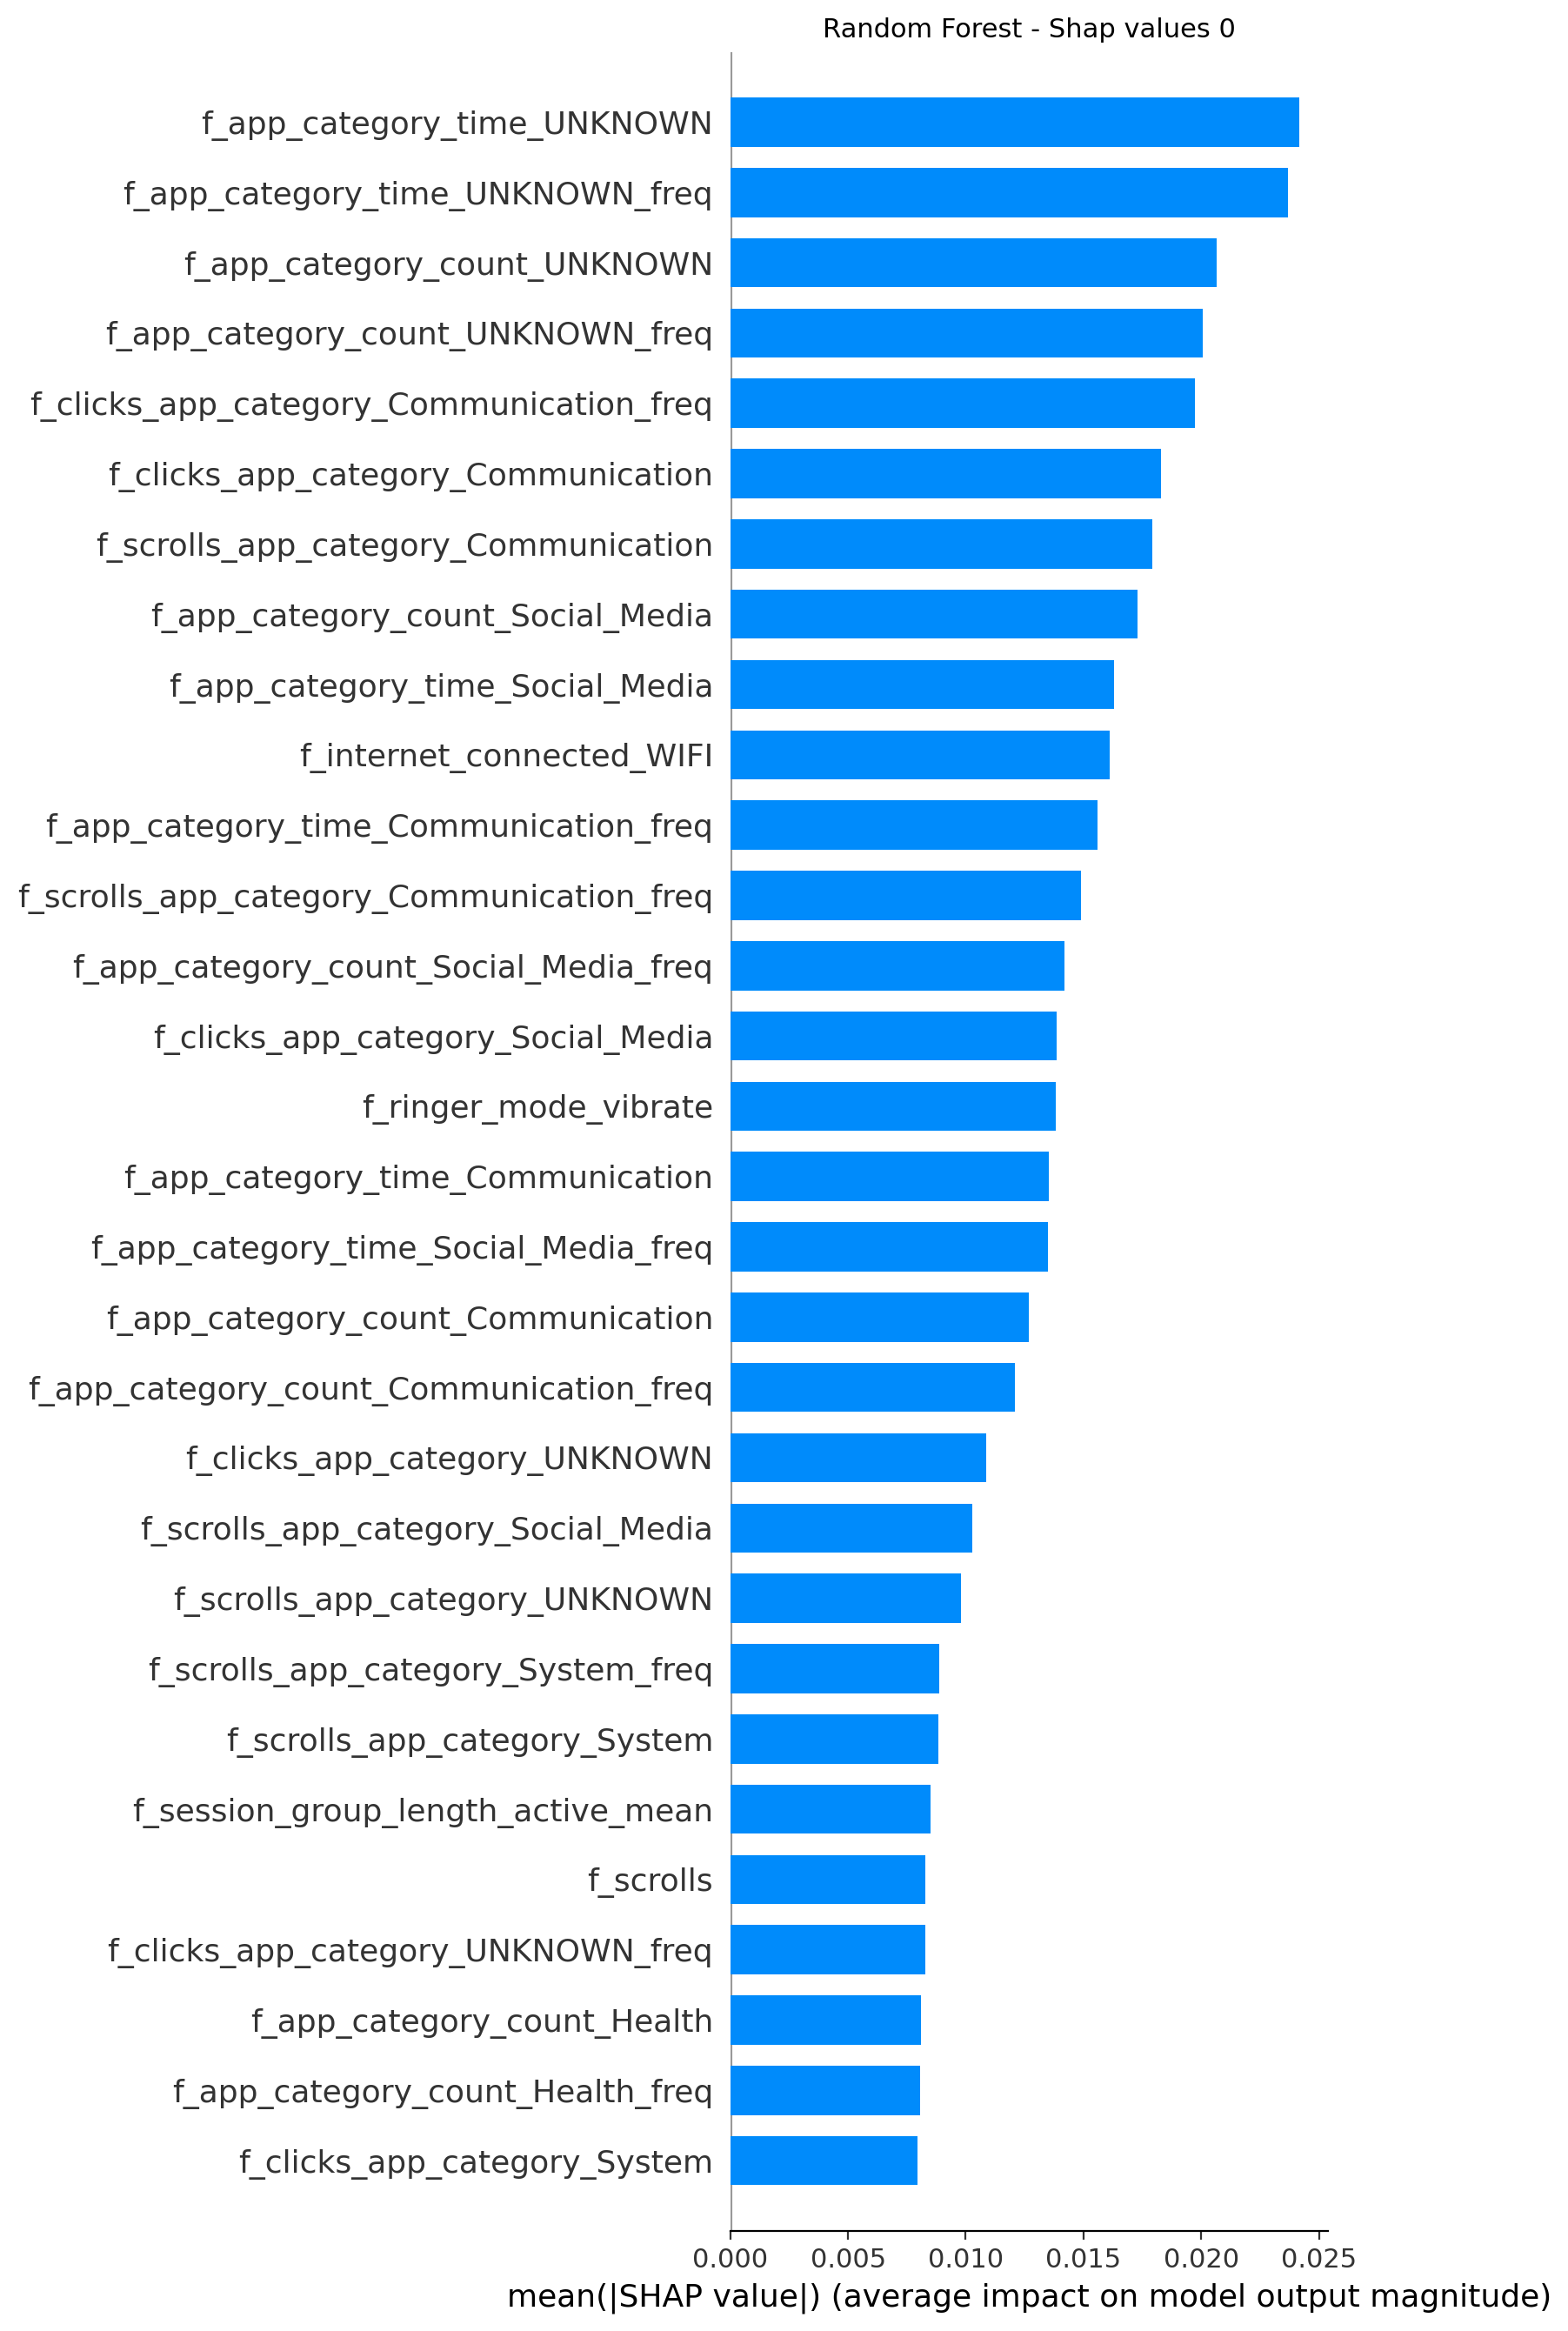

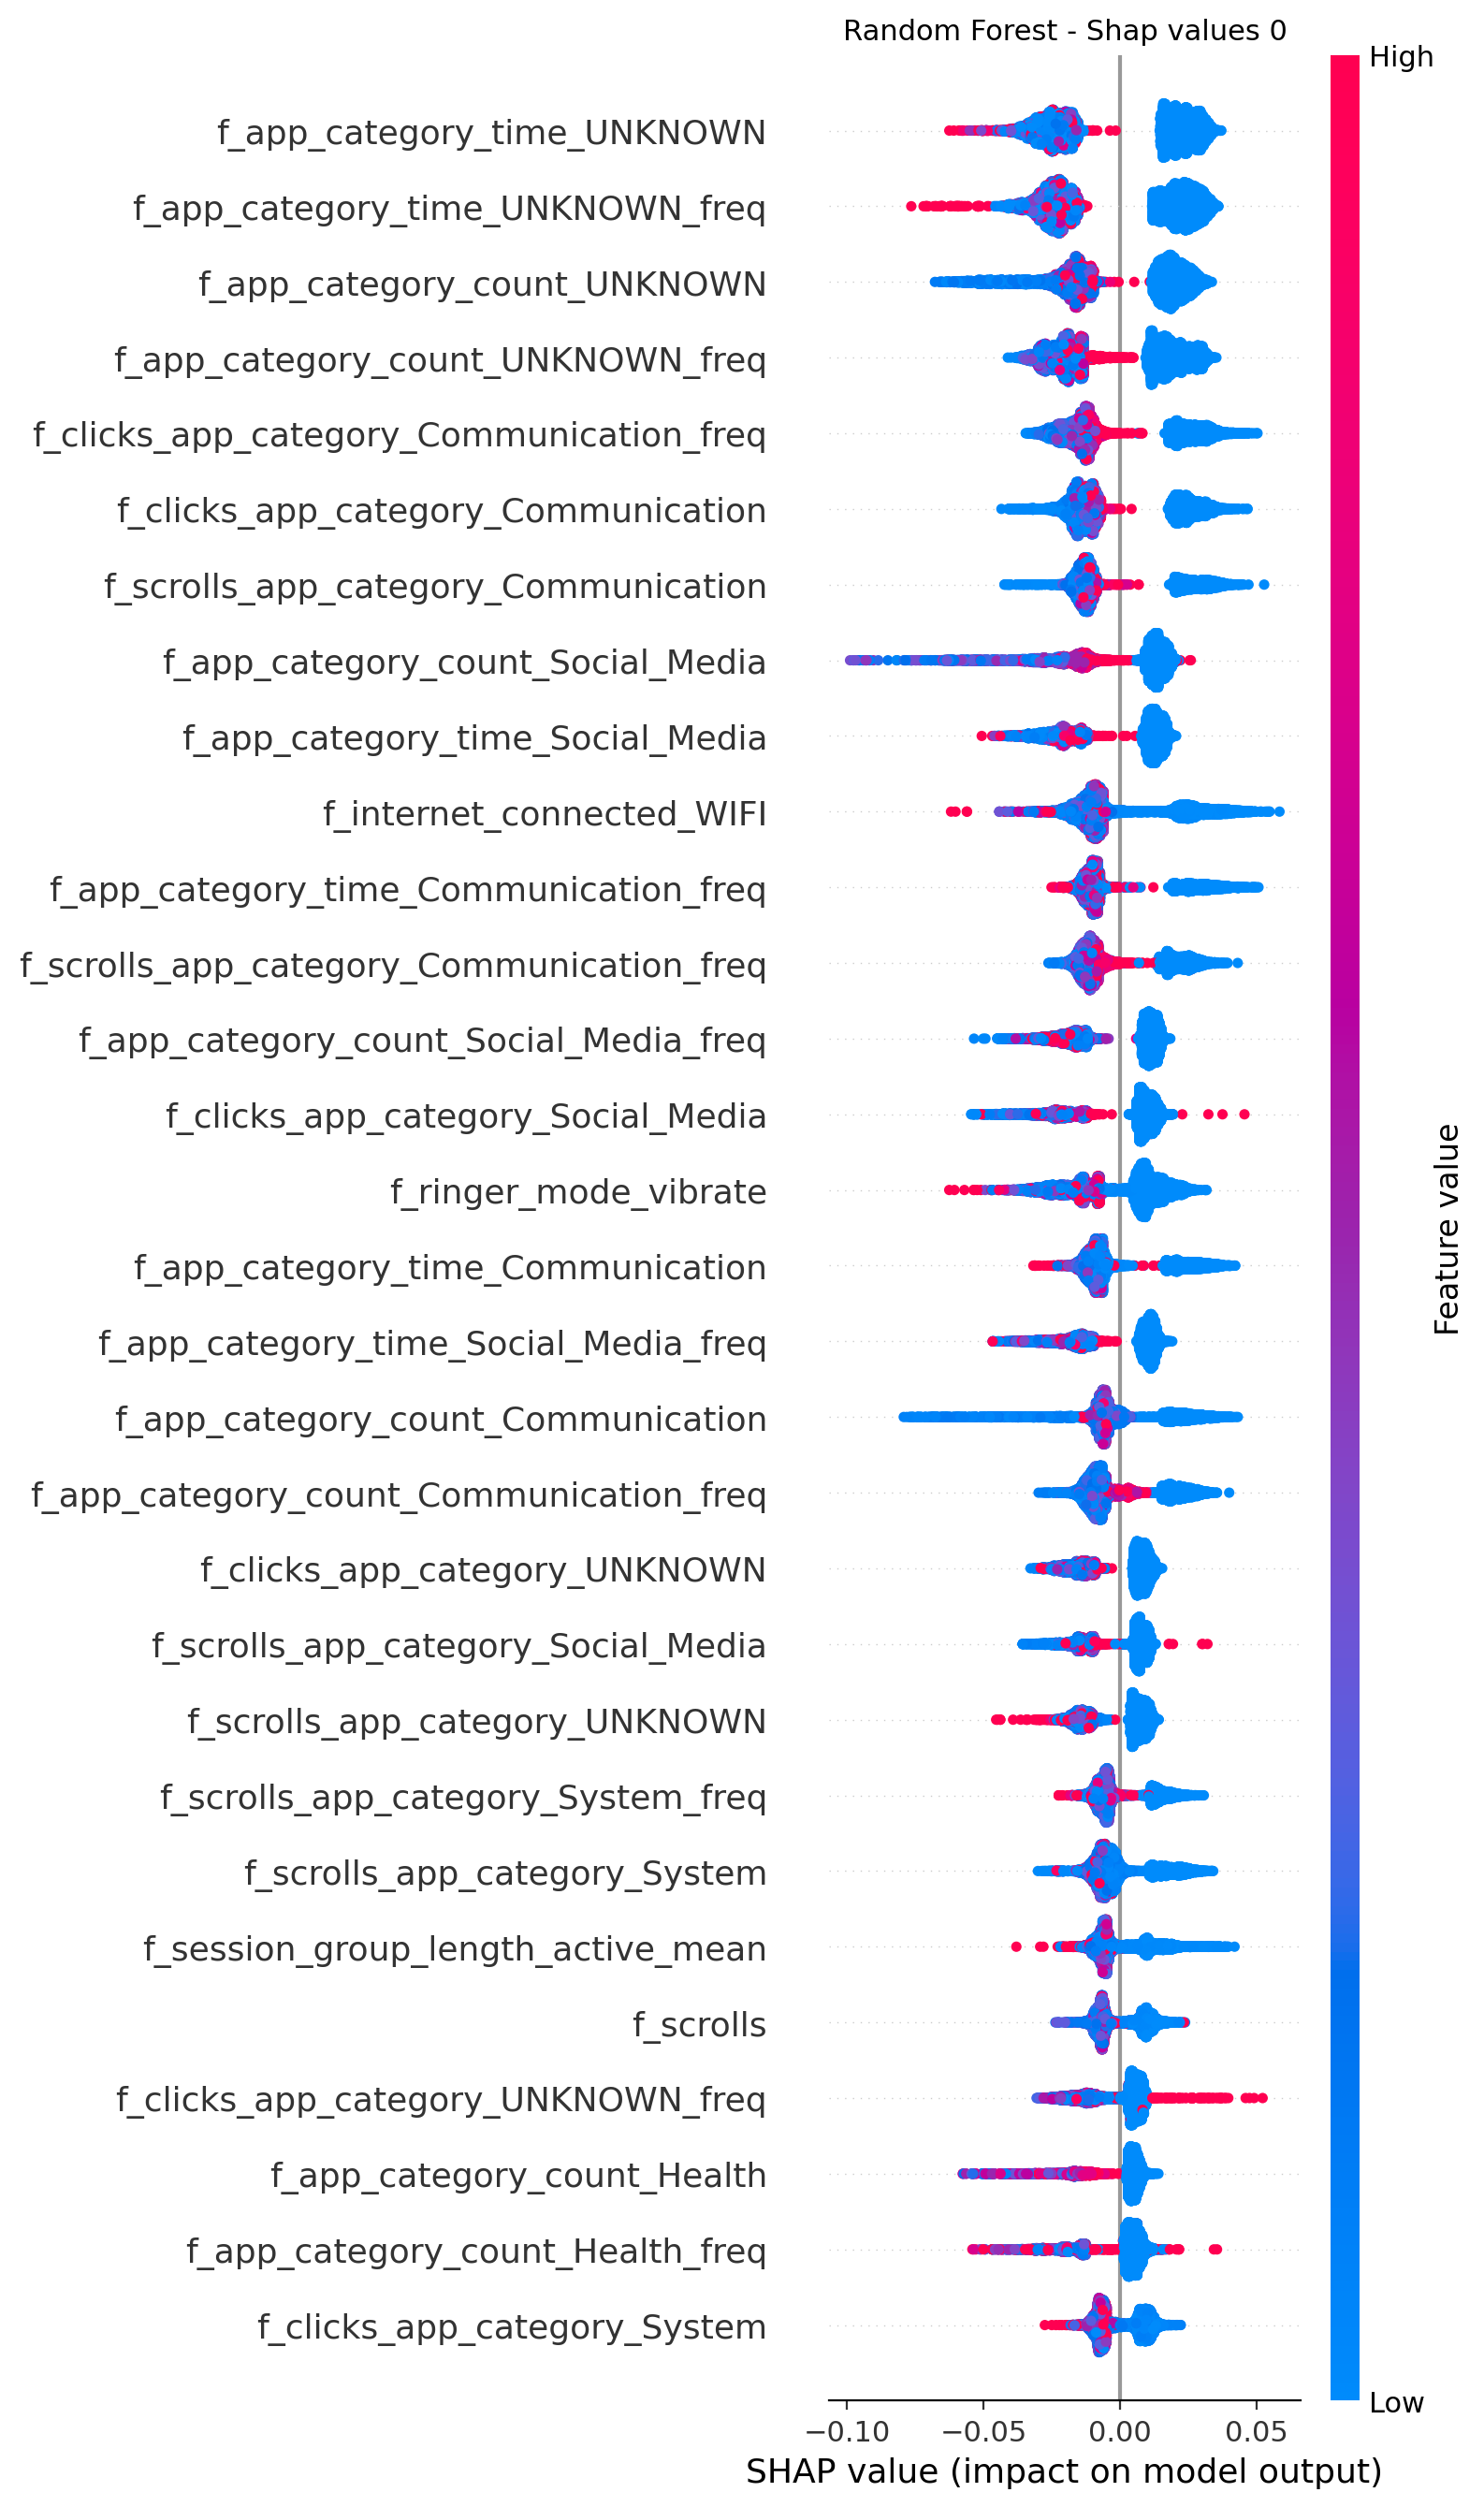

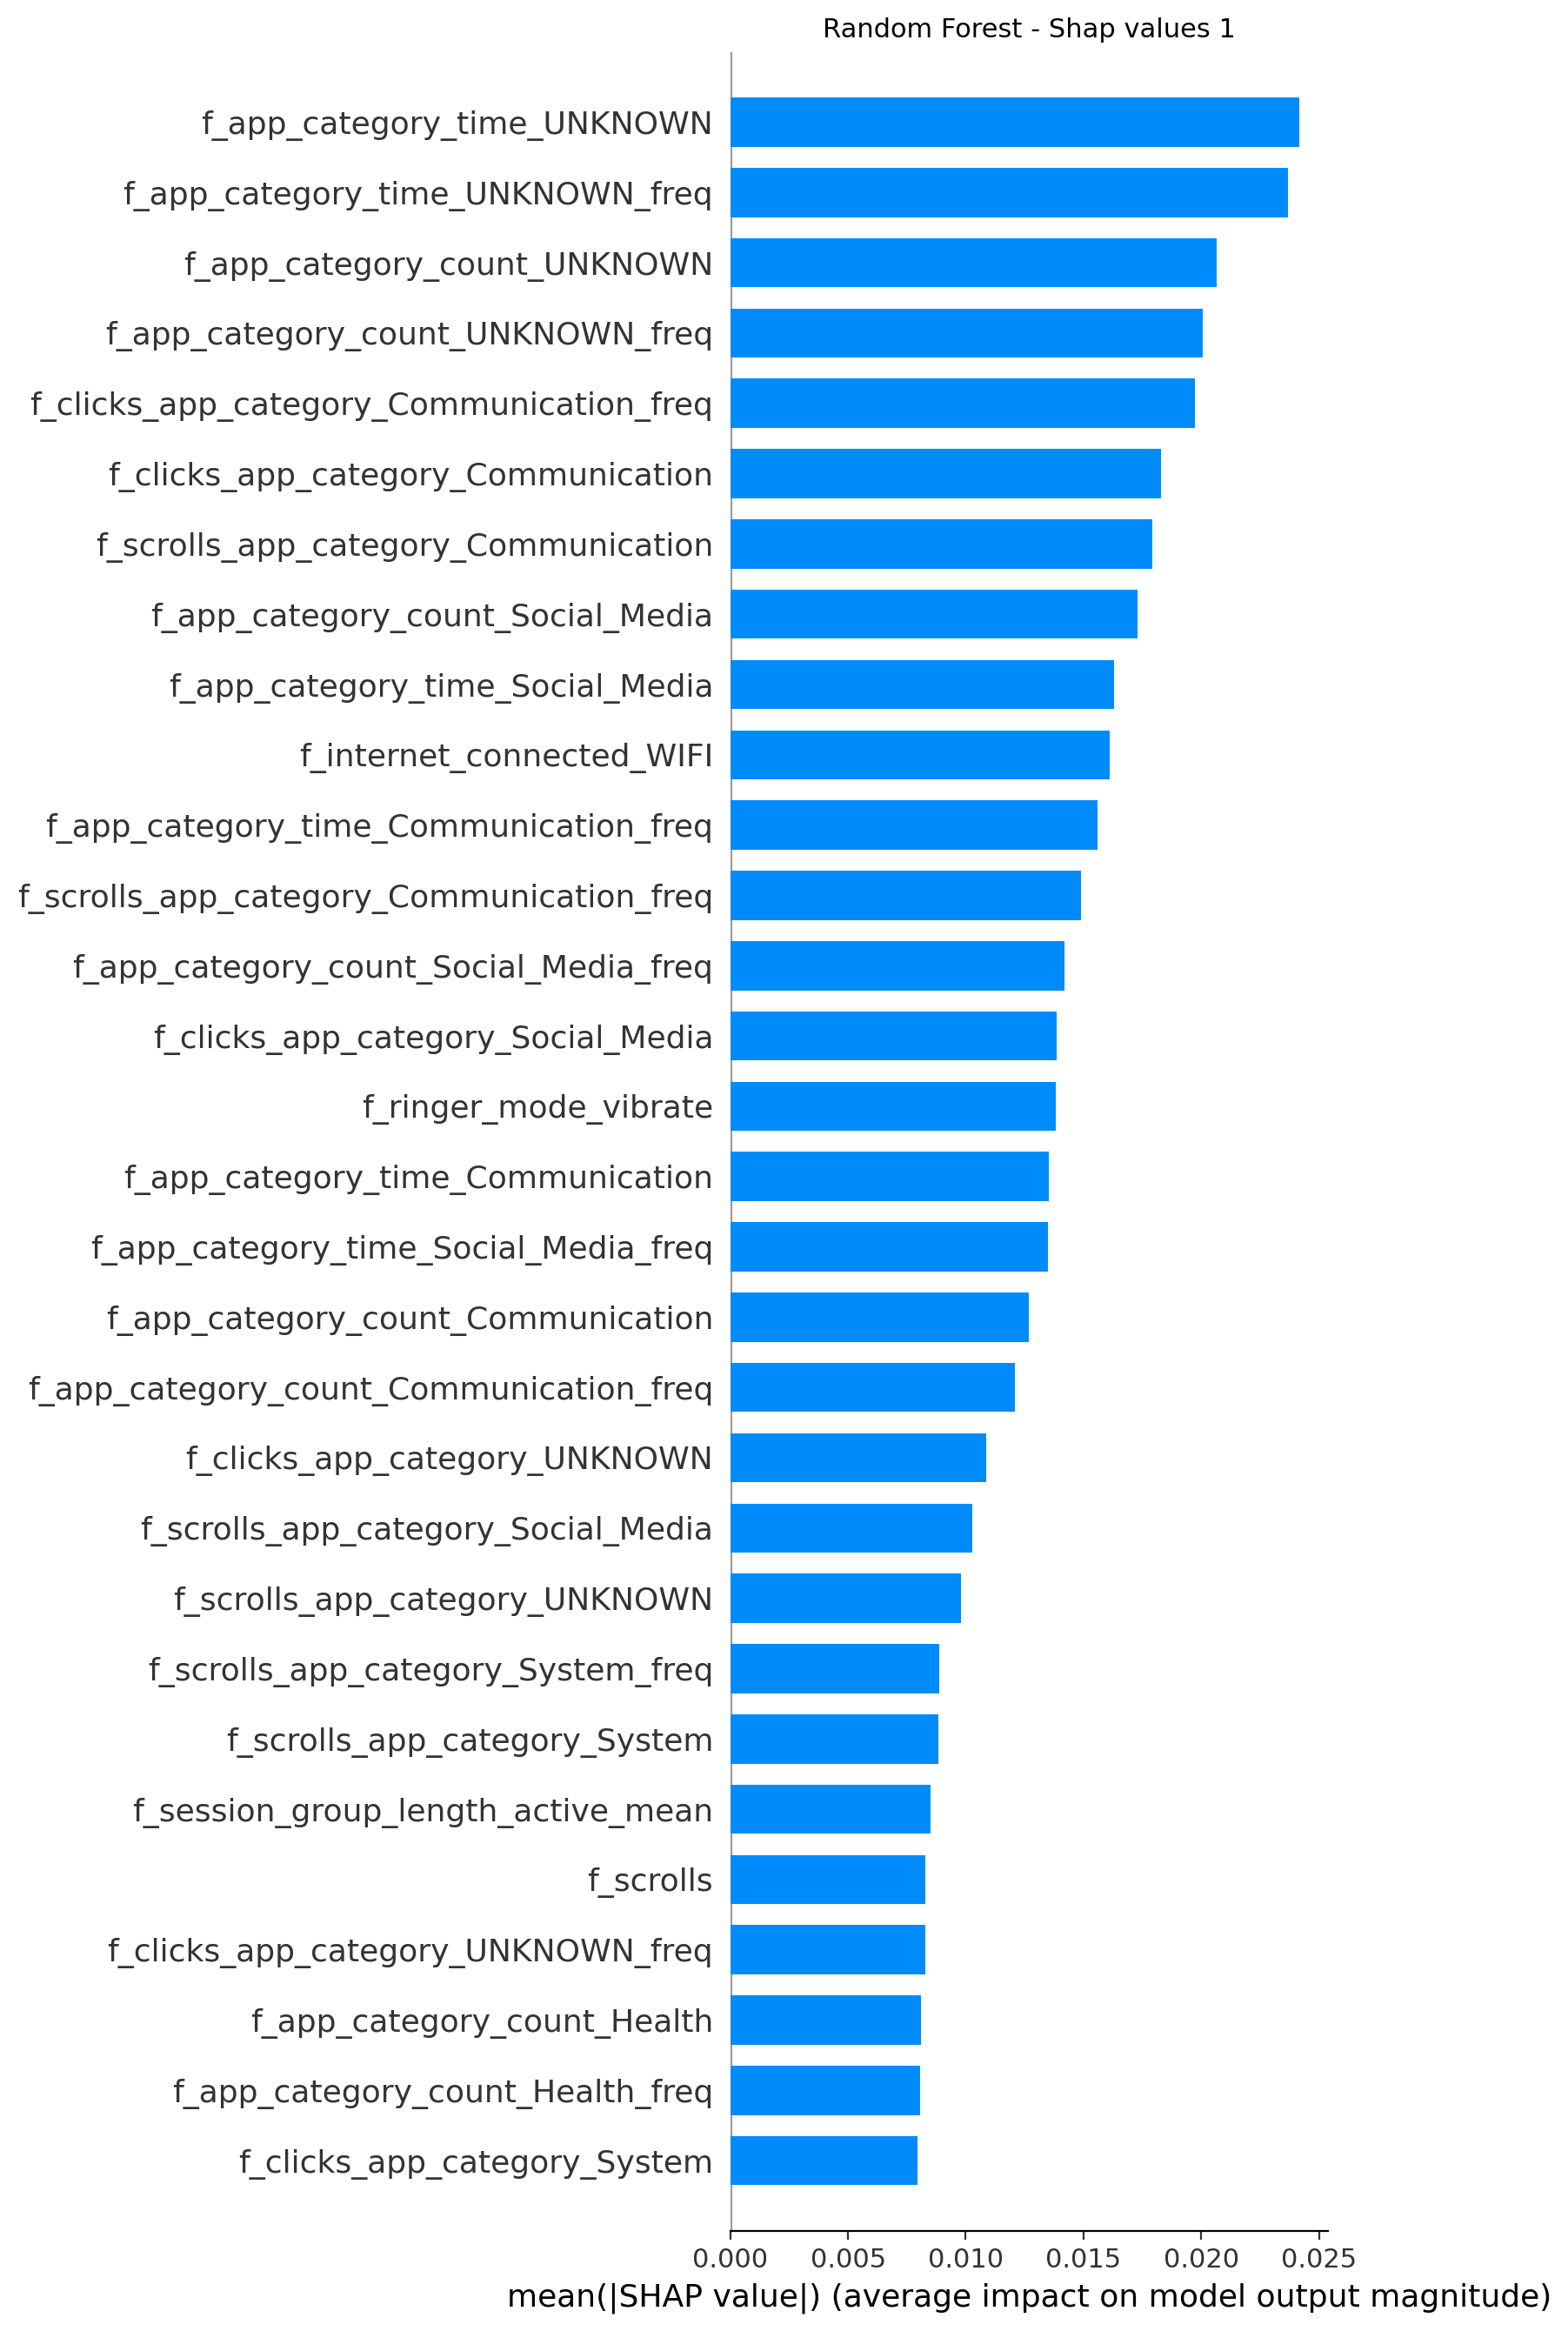

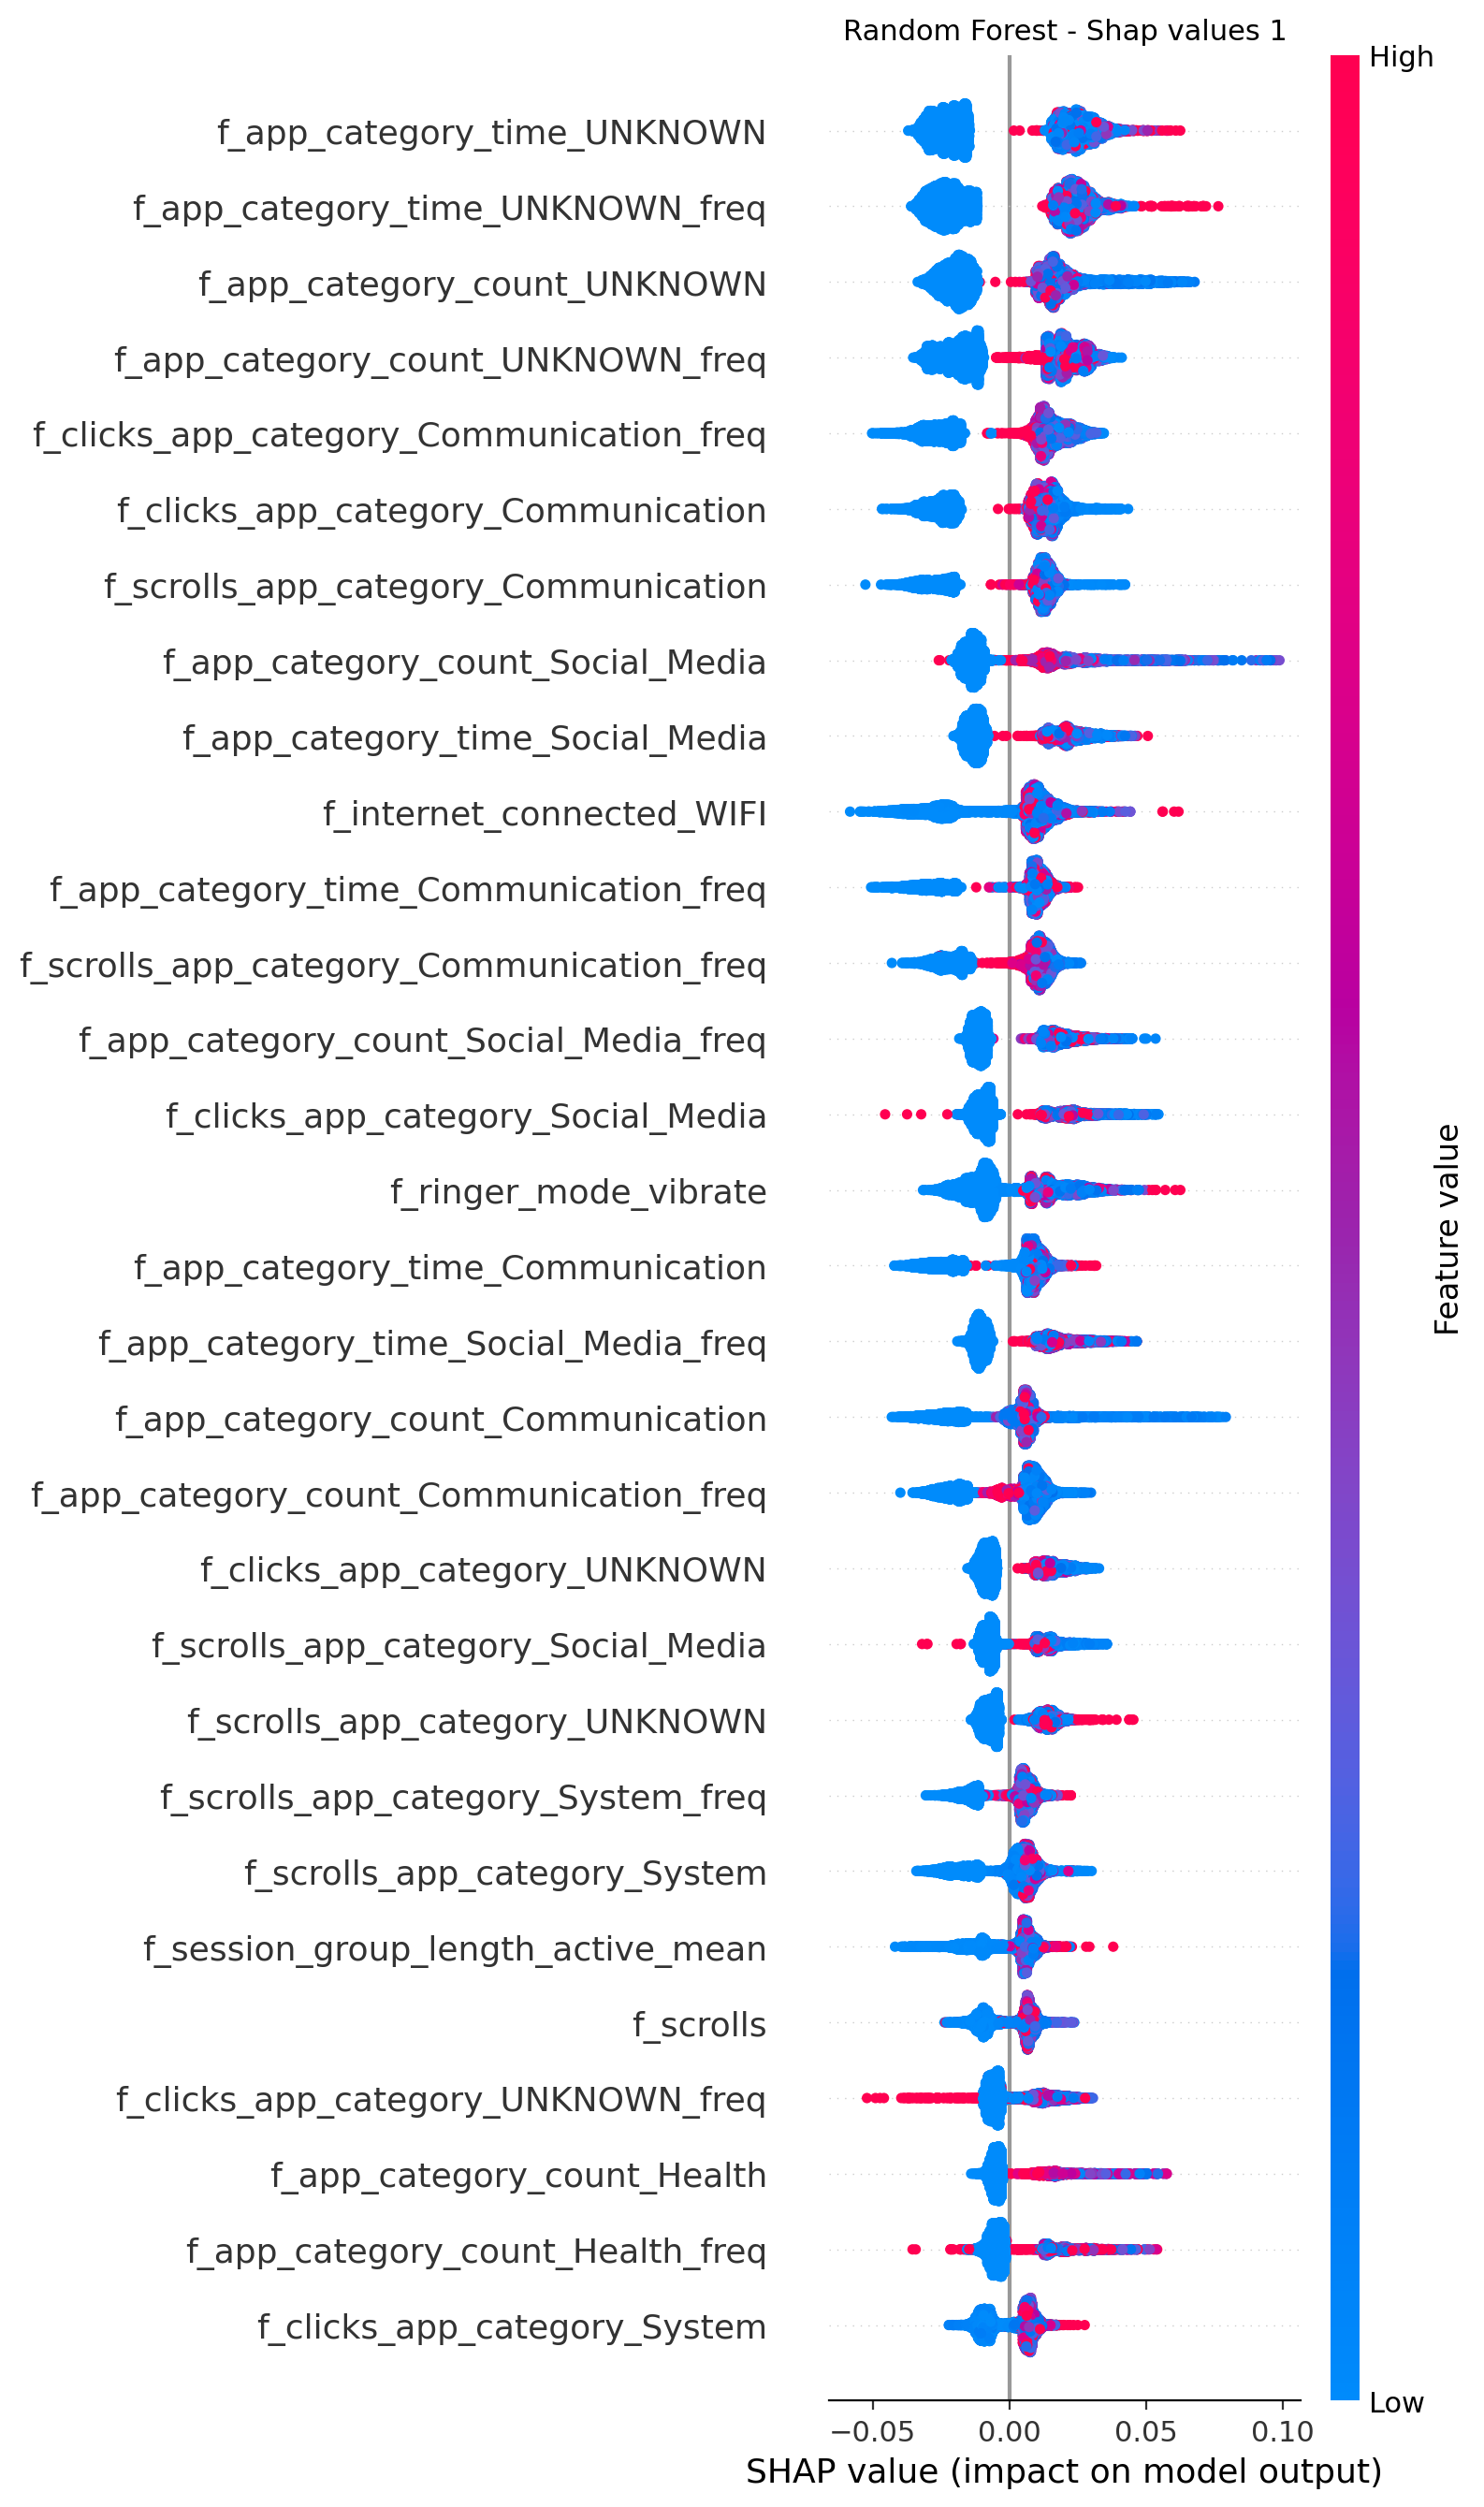

In [11]:
# df_sessions = df_sessions.sample(500)
#df_sessions['p_id'] = df_sessions['group_id'].str.slice(0, 6)
#df_sessions['p_id'] = df_sessions['p_id'].apply(lambda x: abs(hash(x)) % (10 ** 8))

print('ML start.')
filename = "atleastone_more_than_intention"

#  report_all = decision_tree_classifier(x, y, filename, report_all)

report_all, forest = random_forest_classifier(xTrain, yTrain, xVal, yVal, filename, report_all)

#  report_all = naive_bayes_classifier(x, y, filename, report_all)

#  report_all = kNeighbors_classifier(x, y, filename, report_all)

#  report_all = svm_classifier(x, y, filename, report_all)

#report_all.to_csv(fr'./out/report_ml_undersampling_combined_test_no_personal_more1.csv')

print('ML done.')

In [12]:

print("----- Report Validation (run 3) -----")
y_predict = forest.predict(xTest)
print(metrics.classification_report(yTest, y_predict))  # output_dict=True))
#report = pd.DataFrame.from_dict(metrics.classification_report(yTest, y_predict, output_dict=True))
print(metrics.accuracy_score(yTest, y_predict))

----- Report Validation (run 3) -----
               precision    recall  f1-score   support

no_rabbithole       0.65      0.95      0.77      2432
  rabbit_hole       0.91      0.49      0.63      2432

     accuracy                           0.72      4864
    macro avg       0.78      0.72      0.70      4864
 weighted avg       0.78      0.72      0.70      4864

0.7191611842105263
